In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


GPU Available: False
GPU Name: No GPU detected


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,...,20,100,0,50776,3351216,12694.00000,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,...,20,100,0,209360,11834974848,52340.00000,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,0,8,...,20,100,0,3,294,0.75000,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,0,0,...,20,100,0,3,294,0.75000,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,0,8,...,20,100,0,3,294,0.75000,7.092199e-09,7.350000e+01,6.950355e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667518,1.590164e+09,4,10.0.0.11010.0.0.101,10.0.0.11,0,10.0.0.1,0,1,0,0,...,20,100,0,91,8918,0.98913,1.625000e-07,9.693478e+01,1.592500e-05,0
2667519,1.590164e+09,2,10.0.0.1010.0.0.1101,10.0.0.1,0,10.0.0.11,0,1,0,8,...,20,100,0,91,8918,0.98913,1.616341e-07,9.693478e+01,1.584014e-05,0
2667520,1.590164e+09,2,10.0.0.11010.0.0.101,10.0.0.11,0,10.0.0.1,0,1,0,0,...,20,100,0,91,8918,0.98913,1.630824e-07,9.693478e+01,1.598208e-05,0
2667521,1.590164e+09,1,10.0.0.1010.0.0.1101,10.0.0.1,0,10.0.0.11,0,1,0,8,...,20,100,0,91,8918,0.98913,1.610619e-07,9.693478e+01,1.578407e-05,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   datapath_id               int64  
 2   flow_id                   object 
 3   ip_src                    object 
 4   tp_src                    int64  
 5   ip_dst                    object 
 6   tp_dst                    int64  
 7   ip_proto                  int64  
 8   icmp_code                 int64  
 9   icmp_type                 int64  
 10  flow_duration_sec         int64  
 11  flow_duration_nsec        int64  
 12  idle_timeout              int64  
 13  hard_timeout              int64  
 14  flags                     int64  
 15  packet_count              int64  
 16  byte_count                int64  
 17  packet_count_per_second   float64
 18  packet_count_per_nsecond  float64
 19  byte_count_per_second     float64
 20  byte_count_per_nsecond  

In [ ]:
X = df.drop(['timestamp', 'datapath_id','flow_id', 'label'], axis=1)
y = df['label']

In [ ]:
X

,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
0,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00000,1.057833e-04,8.378040e+05,6.981700e-03
1,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00000,4.307819e-04,2.958744e+09,2.435180e+01
2,10.0.0.3,54246,10.0.0.5,5050,1,0,8,4,484000000,20,100,0,3,294,0.75000,6.198347e-09,7.350000e+01,6.074380e-07
3,10.0.0.5,54246,10.0.0.3,5050,1,0,0,4,415000000,20,100,0,3,294,0.75000,7.228916e-09,7.350000e+01,7.084337e-07
4,10.0.0.3,0,10.0.0.5,0,1,0,8,4,423000000,20,100,0,3,294,0.75000,7.092199e-09,7.350000e+01,6.950355e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667518,10.0.0.11,0,10.0.0.1,0,1,0,0,92,560000000,20,100,0,91,8918,0.98913,1.625000e-07,9.693478e+01,1.592500e-05
2667519,10.0.0.1,0,10.0.0.11,0,1,0,8,92,563000000,20,100,0,91,8918,0.98913,1.616341e-07,9.693478e+01,1.584014e-05
2667520,10.0.0.11,0,10.0.0.1,0,1,0,0,92,558000000,20,100,0,91,8918,0.98913,1.630824e-07,9.693478e+01,1.598208e-05
2667521,10.0.0.1,0,10.0.0.11,0,1,0,8,92,565000000,20,100,0,91,8918,0.98913,1.610619e-07,9.693478e+01,1.578407e-05


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    object 
 1   tp_src                    int64  
 2   ip_dst                    object 
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(12), object(2)
memory usage: 366.3+ MB


In [ ]:
X['ip_src'] = X['ip_src'].str.replace('.', '').astype('int64')
X['ip_dst'] = X['ip_dst'].str.replace('.', '').astype('int64')

In [ ]:
X

,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
0,10001,5050,10003,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00000,1.057833e-04,8.378040e+05,6.981700e-03
1,10003,54246,10001,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00000,4.307819e-04,2.958744e+09,2.435180e+01
2,10003,54246,10005,5050,1,0,8,4,484000000,20,100,0,3,294,0.75000,6.198347e-09,7.350000e+01,6.074380e-07
3,10005,54246,10003,5050,1,0,0,4,415000000,20,100,0,3,294,0.75000,7.228916e-09,7.350000e+01,7.084337e-07
4,10003,0,10005,0,1,0,8,4,423000000,20,100,0,3,294,0.75000,7.092199e-09,7.350000e+01,6.950355e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667518,100011,0,10001,0,1,0,0,92,560000000,20,100,0,91,8918,0.98913,1.625000e-07,9.693478e+01,1.592500e-05
2667519,10001,0,100011,0,1,0,8,92,563000000,20,100,0,91,8918,0.98913,1.616341e-07,9.693478e+01,1.584014e-05
2667520,100011,0,10001,0,1,0,0,92,558000000,20,100,0,91,8918,0.98913,1.630824e-07,9.693478e+01,1.598208e-05
2667521,10001,0,100011,0,1,0,8,92,565000000,20,100,0,91,8918,0.98913,1.610619e-07,9.693478e+01,1.578407e-05


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    int64  
 1   tp_src                    int64  
 2   ip_dst                    int64  
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(14)
memory usage: 366.3 MB


In [ ]:
y.value_counts()

,count
label,
1,1760670
0,906853


In [ ]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (2667523, 18)
y: (2667523,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=28)

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
print(f"Train: {X_train.shape} {y_train.shape}")
print(f"Val: {X_val.shape} {y_val.shape}")

Train: (1867266, 18) (1867266,)
Val: (800257, 18) (800257,)


In [ ]:
# prompt: Hãy xây dựng mô hình phân loại cho nhãn 1 và 0 với mô hình Logistic Regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
model_lr = LogisticRegression(solver='liblinear', random_state=28)

# Huấn luyện mô hình
model_lr.fit(X_train, y_train)




LogisticRegression(random_state=28, solver='liblinear')

In [ ]:
# Dự đoán trên tập validation
y_pred_lr = model_lr.predict(X_val)
y_prob_lr = model_lr.predict_proba(X_val)[:, 1] # Xác suất của lớp dương (lớp 1)

# Đánh giá mô hình
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
roc_auc_lr = roc_auc_score(y_val, y_prob_lr)
log_loss_lr = log_loss(y_val, y_prob_lr)
cm_lr = confusion_matrix(y_val, y_pred_lr)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print(f"ROC AUC: {roc_auc_lr:.4f}")
print(f"Log Loss: {log_loss_lr:.4f}")
print("Confusion Matrix:")
print(cm_lr)



Logistic Regression Results:
Accuracy: 0.9908
Precision: 0.9986
Recall: 0.9875
F1-score: 0.9930
ROC AUC: 0.9963
Log Loss: 0.0580
Confusion Matrix:
[[271112    728]
 [  6614 521803]]


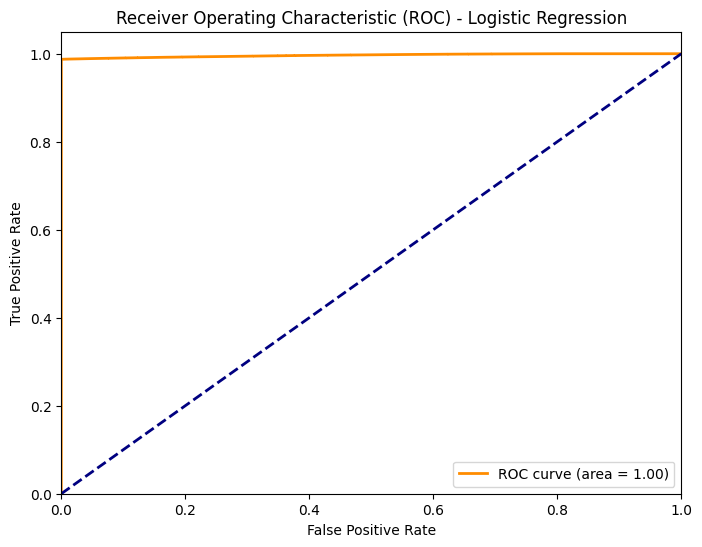

In [ ]:
# Vẽ ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

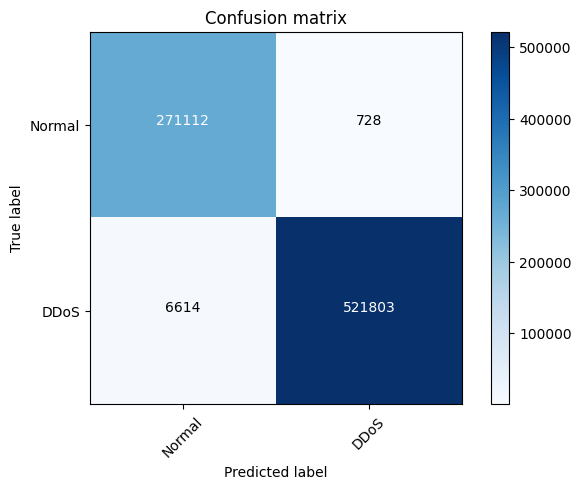

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Dùng y_val nếu bạn dùng Random forest
cm = confusion_matrix(y_val, y_pred_lr, labels=np.unique(y_val))
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'DDoS'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'DDoS'])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()